목적 : 탐색적 데이터 분석 EDA
=====================
목표 : 기초통계량, 상관분석(+유의성 검정),Q-Qplot
-------------------------    

import modules

In [45]:
import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

import platform
if platform.system() == "Darwin":           # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')


import scipy.stats as stats
from scipy.stats import shapiro, pearsonr
from itertools import combinations

환경설정

In [46]:
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

# pd.set_option('display.max_columns', None)
pd.reset_option('display.max_columns')

pd.set_option('display.max_seq_items', None)

pd.set_option('float_format', '{:.3f}'.format) # 소수점 3개까지 출력

load file

In [47]:
listed = pd.read_csv("./상장후보피처+시장지표.csv")
# 영업년수와 상장년수가 있더라

# describe

In [48]:
listed

,회사명,거래소코드,회계년도,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,유동비율,당좌비율,부채비율,...,상장년수,PER,PBR,PCR,PSR,부실판단,도입기,성숙기,성장기,쇠퇴기
0,(주)CMG제약,58820,2022,19,79,2,6,617,520,15,...,23.000,-716.667,1614.563,60479.048,3632.941,0.000,0,0,1,0
1,(주)ES큐브,50120,2020,3,270,3,24,62,60,929,...,22.000,-0.202,1089.064,-2022.628,938.209,1.000,0,0,0,1
2,(주)MH에탄올,23150,2022,6,9,5,19,28,23,369,...,28.000,8.717,588.595,3407.741,507.129,0.000,0,1,0,0
3,(주)강원에너지,114190,2018,-16,-28,-7,-8,162,161,87,...,15.000,21.077,838.689,-4138.892,490.136,1.000,1,0,0,0
4,(주)고려시멘트,198440,2022,0,7,0,0,402,335,25,...,10.000,-9.794,696.142,-5781.497,1088.800,0.000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,(주)한중엔시에스,107640,2016,2,2,1,1,83,58,363,...,11.000,-10.445,1047753.961,18230918.925,268881.490,1.000,0,0,1,0
727,도부마스크 (주),227420,2018,-28,-77,-18,-21,139,139,169,...,8.000,-1.147,796145.536,-5380708.257,342291.871,1.000,0,0,0,1
728,에이치엔에스하이텍(주),44990,2021,13,44,6,5,189,150,99,...,9.000,7.601,2047153.005,16297442.427,885738.679,1.000,0,0,1,0
729,에이펙스인텍(주),207490,2022,3,4,2,2,123,89,219,...,6.000,309.091,3549369.291,5973645.681,1154390.267,0.000,0,0,1,0


In [49]:
listed.describe()

,거래소코드,회계년도,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,유동비율,당좌비율,부채비율,유동부채비율,...,상장년수,PER,PBR,PCR,PSR,부실판단,도입기,성숙기,성장기,쇠퇴기
count,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,...,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000
mean,136485.349,2019.681,8.167,1272.220,-0.018,-2.743,299.781,248.044,122.133,95.819,...,15.402,-12.492,828706.580,-59581.392,421888.643,0.503,0.283,0.304,0.215,0.198
std,125026.425,3.012,51.058,23030.585,13.794,41.623,383.778,356.115,368.257,332.637,...,9.547,1004.117,19538609.316,6186722.582,9127352.329,0.500,0.451,0.460,0.411,0.399
min,40.000,2014.000,-606.000,-5211.000,-255.000,-620.000,4.000,3.000,0.000,0.000,...,0.000,-18475.906,-41590963.719,-48253995.691,0.000,0.000,0.000,0.000,0.000,0.000
25%,49495.000,2017.000,-10.000,-14.000,-4.000,-7.000,103.000,70.000,31.500,20.500,...,8.000,-10.569,921.397,-19862.022,755.621,0.000,0.000,0.000,0.000,0.000
50%,100660.000,2022.000,2.000,2.000,1.000,2.000,167.000,124.000,69.000,48.000,...,14.000,-1.046,1507.177,3458.297,1524.945,1.000,0.000,0.000,0.000,0.000
75%,214220.000,2022.000,18.000,37.000,6.000,10.000,327.500,261.000,129.000,99.500,...,22.000,16.487,2844.279,15128.207,3104.285,1.000,1.000,1.000,0.000,0.000
max,900340.000,2022.000,259.000,611057.000,44.000,90.000,3542.000,3246.000,9039.000,8254.000,...,56.000,8800.000,524652402.569,119828057.745,246199224.745,1.000,1.000,1.000,1.000,1.000


In [50]:
listed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   회사명                731 non-null    object 
 1   거래소코드              731 non-null    int64  
 2   회계년도               731 non-null    int64  
 3   CASH FLOW 대 부채비율   731 non-null    int64  
 4   CASH FLOW 대 차입금비율  731 non-null    int64  
 5   CASH FLOW 대 총자본비율  731 non-null    int64  
 6   CASH FLOW 대 매출액비율  731 non-null    int64  
 7   유동비율               731 non-null    int64  
 8   당좌비율               731 non-null    int64  
 9   부채비율               731 non-null    int64  
 10  유동부채비율             731 non-null    int64  
 11  차입금의존도             731 non-null    int64  
 12  순운전자본비율            731 non-null    int64  
 13  현금비율               731 non-null    int64  
 14  유동자산구성비율           731 non-null    int64  
 15  자기자본구성비율           731 non-null    int64  
 16  자기자본순이익률           731 non

In [51]:
listed.columns

Index(['회사명', '거래소코드', '회계년도', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 차입금비율',
       'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율', '유동비율', '당좌비율', '부채비율',
       '유동부채비율', '차입금의존도', '순운전자본비율', '현금비율', '유동자산구성비율', '자기자본구성비율',
       '자기자본순이익률', '경영자본순이익률', '매출액순이익률', '총자본사업이익률', '총자본정상영업이익률',
       '매출액정상영업이익률', '금융비용부담률', 'CROE', '총자산증가율', '총자본증가율', '유동자산증가율',
       '비유동자산증가율', '매출액증가율', '유형자산증가율', '부가가치(백만원)', '총자본투자효율', '설비투자효율',
       '부가가치율', '이윤분배율', '자본분배율', '총자산회전율', '매출채권회전률', '당좌자산회전률', '유형자산회전율',
       '경영자본회전률', '총자본회전률', '비유동자산회전률', '유동자산회전률', '영업년수', '상장년수', 'PER',
       'PBR', 'PCR', 'PSR', '부실판단', '도입기', '성숙기', '성장기', '쇠퇴기'],
      dtype='object')

In [52]:
listed.isna().sum().sort_values(ascending=False)

회사명                  0
총자본회전률               0
부가가치(백만원)            0
총자본투자효율              0
설비투자효율               0
부가가치율                0
이윤분배율                0
자본분배율                0
총자산회전율               0
매출채권회전률              0
당좌자산회전률              0
유형자산회전율              0
경영자본회전률              0
비유동자산회전률             0
매출액증가율               0
유동자산회전률              0
영업년수                 0
상장년수                 0
PER                  0
PBR                  0
PCR                  0
PSR                  0
부실판단                 0
도입기                  0
성숙기                  0
성장기                  0
유형자산증가율              0
비유동자산증가율             0
거래소코드                0
현금비율                 0
회계년도                 0
CASH FLOW 대 부채비율     0
CASH FLOW 대 차입금비율    0
CASH FLOW 대 총자본비율    0
CASH FLOW 대 매출액비율    0
유동비율                 0
당좌비율                 0
부채비율                 0
유동부채비율               0
차입금의존도               0
순운전자본비율              0
유동자산구성비율             0
유동자산증가율              0
자기자본구성비율   

In [53]:
listed.isin([0]).sum().sort_values(ascending=False)

쇠퇴기                  586
성장기                  574
도입기                  524
성숙기                  509
부실판단                 363
총자본회전률               267
경영자본회전률              178
자본분배율                109
이윤분배율                107
비유동자산회전률              71
유동자산회전률               68
당좌자산회전률               53
차입금의존도                48
CASH FLOW 대 총자본비율     28
CASH FLOW 대 차입금비율     22
유형자산회전율               20
비유동자산증가율              18
매출액증가율                17
유형자산증가율               17
총자본증가율                17
유동자산증가율               17
CASH FLOW 대 매출액비율     12
현금비율                  11
CASH FLOW 대 부채비율       8
순운전자본비율                6
PBR                    6
PSR                    6
PCR                    6
유동부채비율                 6
PER                    6
부채비율                   5
자기자본순이익률               4
자기자본구성비율               4
총자본투자효율                4
CROE                   3
부가가치율                  3
매출채권회전률                2
총자산회전율                 1
설비투자효율                 1
상장년수                   1


In [54]:
listed.isin([np.inf]).value_counts()

회사명    거래소코드  회계년도   CASH FLOW 대 부채비율  CASH FLOW 대 차입금비율  CASH FLOW 대 총자본비율  CASH FLOW 대 매출액비율  유동비율   당좌비율   부채비율   유동부채비율  차입금의존도  순운전자본비율  현금비율   유동자산구성비율  자기자본구성비율  자기자본순이익률  경영자본순이익률  매출액순이익률  총자본사업이익률  총자본정상영업이익률  매출액정상영업이익률  금융비용부담률  CROE   총자산증가율  총자본증가율  유동자산증가율  비유동자산증가율  매출액증가율  유형자산증가율  부가가치(백만원)  총자본투자효율  설비투자효율  부가가치율  이윤분배율  자본분배율  총자산회전율  매출채권회전률  당좌자산회전률  유형자산회전율  경영자본회전률  총자본회전률  비유동자산회전률  유동자산회전률  영업년수   상장년수   PER    PBR    PCR    PSR    부실판단   도입기    성숙기    성장기    쇠퇴기  
False  False  False  False             False              False              False              False  False  False  False   False   False    False  False     False     False     False     False    False     False       False       False    False  False   False   False    False     False   False    False      False    False   False  False  False  False   False    False    False    False    False   False     False    False  False  False  False  False  False  False  False  False  False  False    731
N

범주 분할 1현금흐름 / 2안정성 / 2수익성 / 3유동성 / 4성장성 / 5생산성 / 6활동성 / 7시장지표 및 기타

In [55]:
# 상장 all data는 unlisted
# 상장 label들

labels = listed[
    [
        '거래소코드',
        '회계년도',
        '부실판단',
        '도입기',
        '성숙기',
        '성장기',
        '쇠퇴기'
    ]
]

# 상장 피처
features = listed.drop(
    labels=[
        '회사명',
        '거래소코드',
        '회계년도'        
    ],
    axis=1,    
)

# 현금흐름 4개
cash_ft1 = listed[
    [
        'CASH FLOW 대 부채비율',
        'CASH FLOW 대 차입금비율',
        'CASH FLOW 대 총자본비율',
        'CASH FLOW 대 매출액비율',
        '부실판단'
    ]
]

# 안정성 10개
stability_ft1 = listed[
    [
        '유동비율',
        '당좌비율',
        '부채비율',
        '유동부채비율',
        '차입금의존도',
        '순운전자본비율',
        '현금비율',
        '유동자산구성비율',
        '자기자본구성비율',
        '부실판단'
    ]
]

# 수익성 10개
profitability_ft1 = listed[
    [
        '자기자본순이익률',
        '경영자본순이익률',
        '매출액순이익률',
        '총자본사업이익률',
        '총자본정상영업이익률',
        '매출액정상영업이익률',
        '금융비용부담률',
        'CROE',
        '부실판단'
    ]
]

# 성장성 8개
growth_ft1 = listed[
    [
        '총자산증가율',
        '총자본증가율',
        '유동자산증가율',
        '비유동자산증가율',
        '매출액증가율',
        '유형자산증가율',
        '부실판단'
    ]
]

# 생산성 5개
productivity_ft1 = listed[
    [
        '부가가치(백만원)',
        '총자본투자효율',
        '설비투자효율',
        '부가가치율',
        '이윤분배율',
        '자본분배율',
        '부실판단'
    ]
]

# 활동성 10개
activity_ft1 = listed[
    [
        '총자산회전율',
        '매출채권회전률',
        '당좌자산회전률',
        '유형자산회전율',
        '경영자본회전률',
        '총자본회전률',
        '비유동자산회전률',
        '유동자산회전률',
        '부실판단'
    ]
]

# 시장지표 및 기타
etc_ft1 = listed[
    [
        '영업년수',
        '상장년수',
        'PER',
        'PBR',
        'PCR',
        'PSR',      
        '도입기',
        '성숙기',
        '성장기',
        '쇠퇴기',
        '부실판단'
    ]
]

# Q-Qplot

In [56]:
def qq_plot(df):
    fig, axes = plt.subplots(13, 5, figsize=(15, 25))
    fig.subplots_adjust(wspace=0.5, hspace=0.5)  # 서브플롯 간 간격 조정
    
    for i in range(13):
        for j in range(5):
            col_index = i * 5 + j
            if col_index < len(df.columns):
                # Q-Q plot 그리기
                stats.probplot(df[df.columns[col_index]], dist="norm", plot=axes[i, j])
                axes[i, j].set_title(f"{df.columns[col_index]}")
            else:
                # 데이터프레임 칼럼 수보다 많은 서브플롯은 숨김
                axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

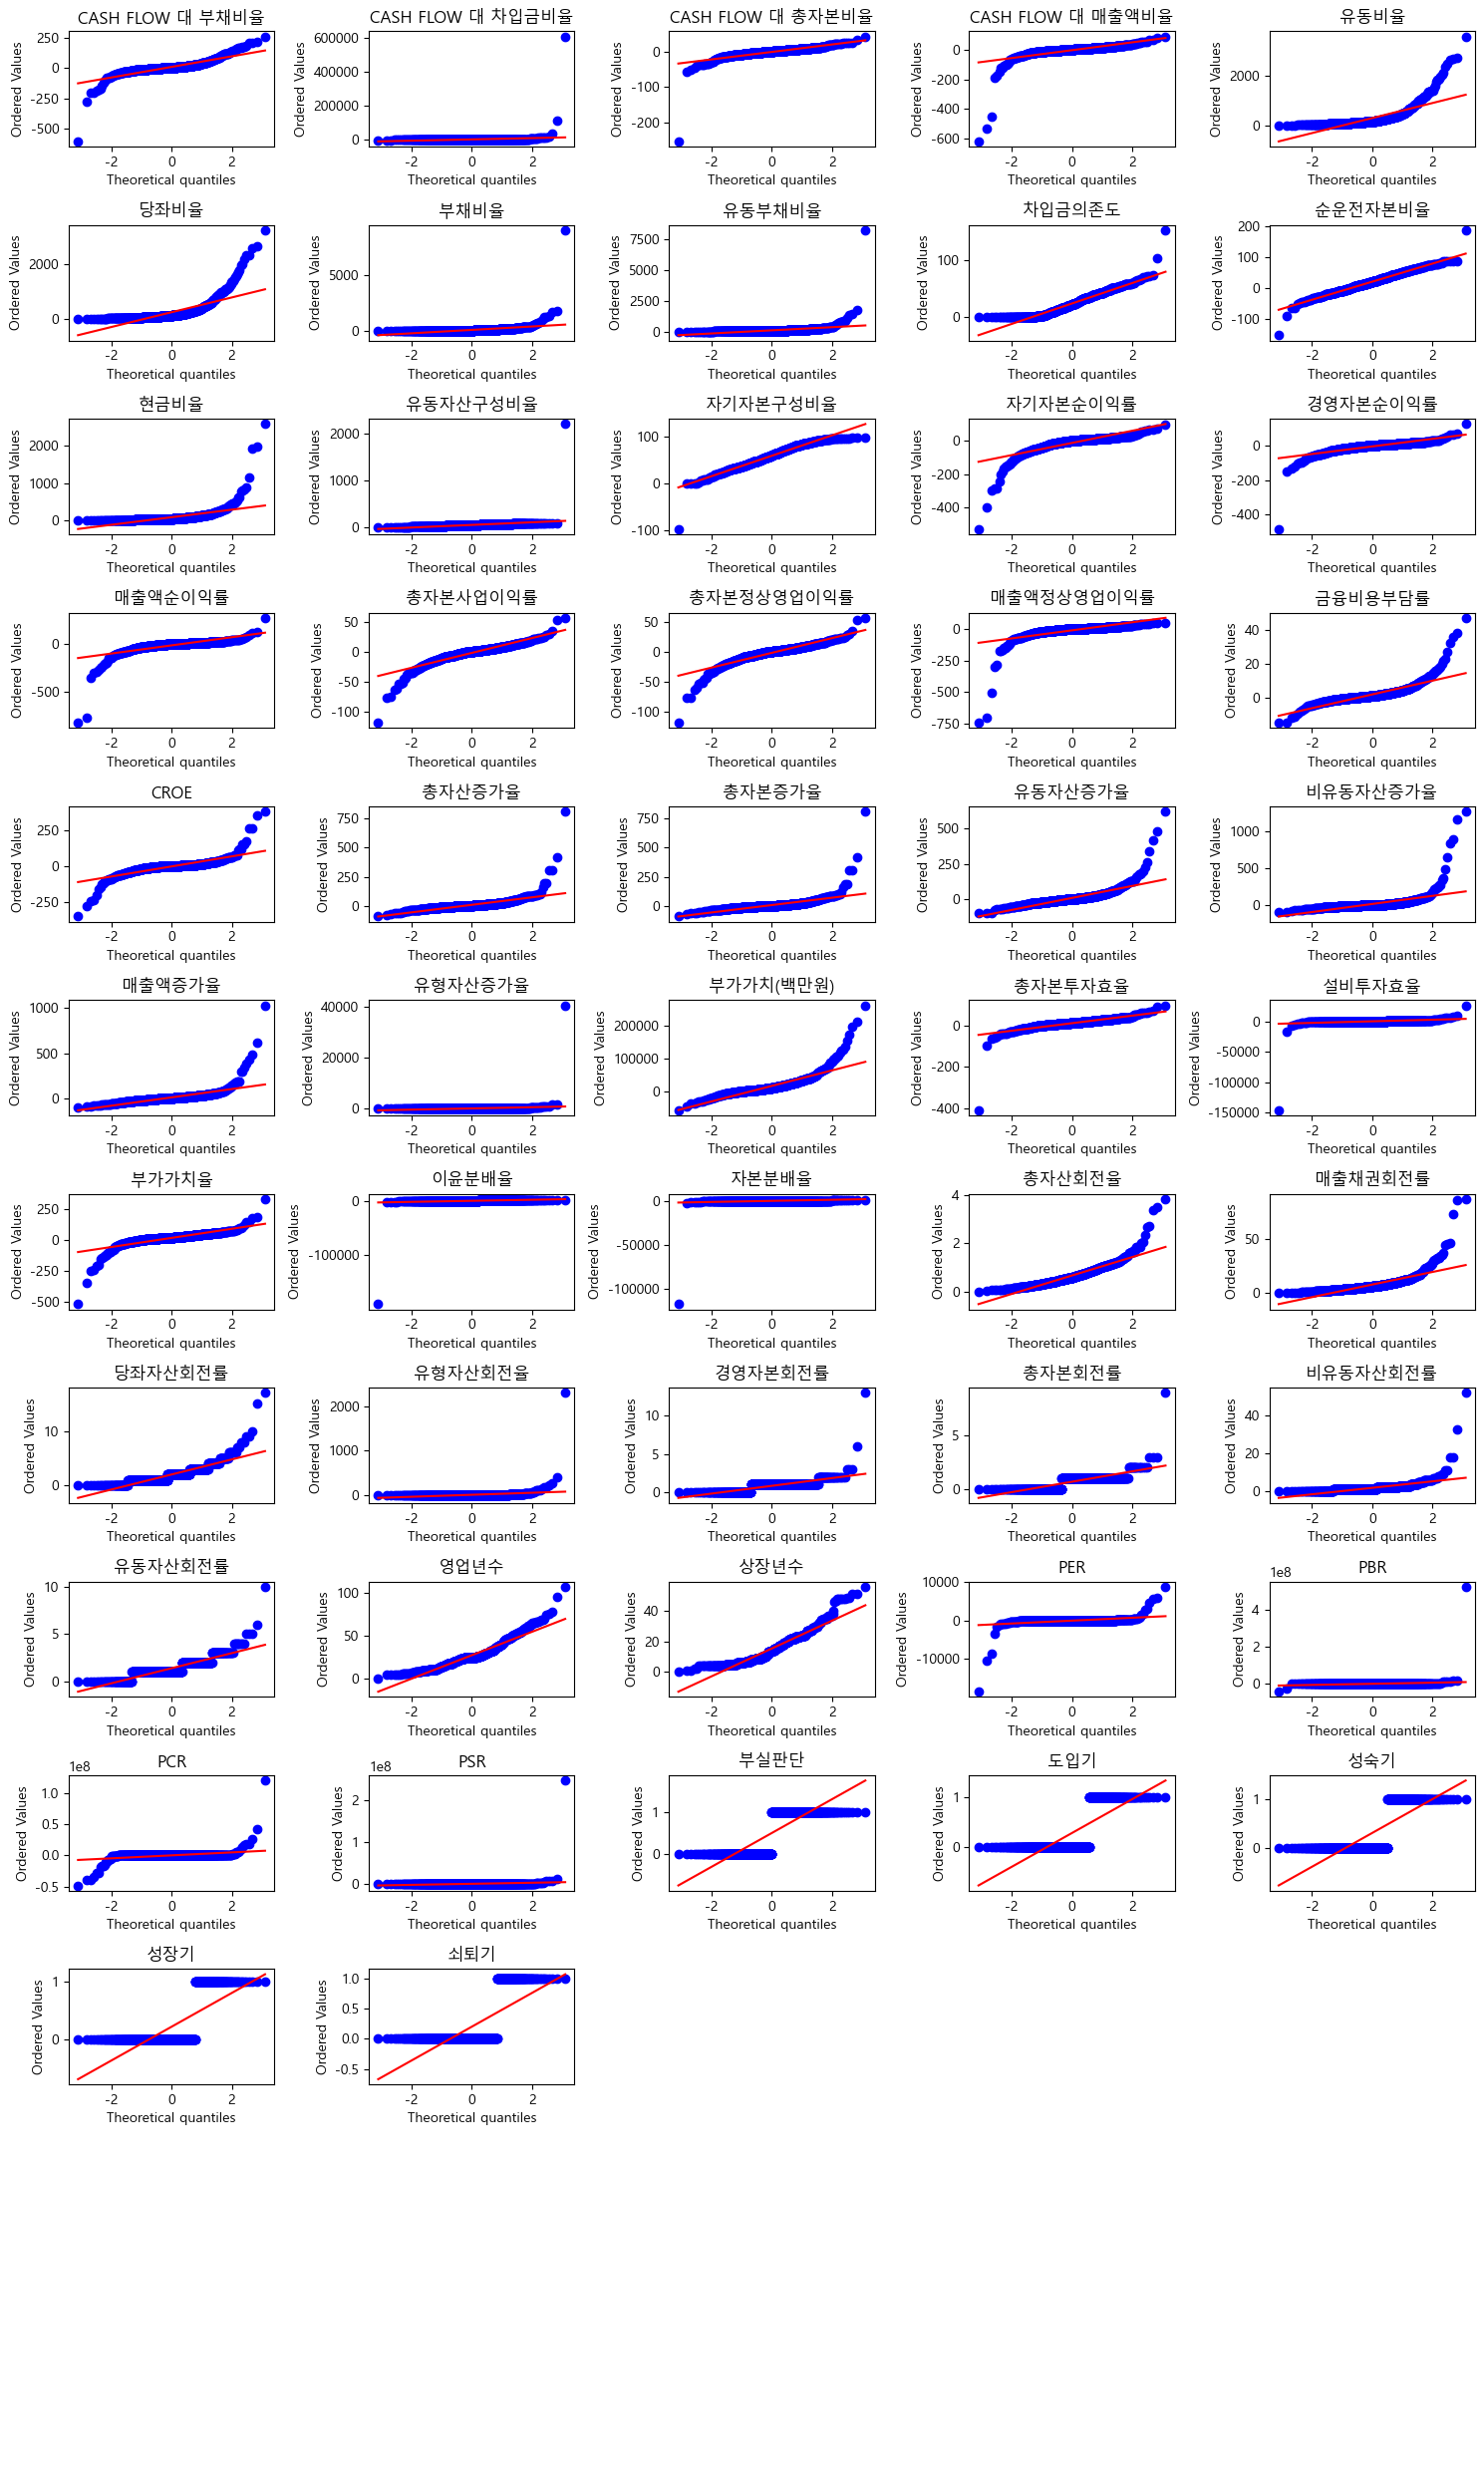

In [57]:
qq_plot(features)

# 윈저라이징

In [58]:
# 한 컬럼마다 할 수 있는 윈저라이징
import numpy as np

def winsorize(data, lower_percentile=5, upper_percentile=95):
    """
    이상치를 Winsorizing하여 데이터를 변형하는 함수
    
    Parameters:
    - data: 변형하려는 데이터 배열
    - lower_percentile: 이상치를 대체할 하한 백분위수
    - upper_percentile: 이상치를 대체할 상한 백분위수
    
    Returns:
    - winsorized_data: Winsorizing이 적용된 데이터 배열
    """
    lower_limit = np.percentile(data, lower_percentile)
    upper_limit = np.percentile(data, upper_percentile)
    
    daco = data.copy()
    # 하한 이상치 대체
    daco[daco < lower_limit] = lower_limit
    
    # 상한 이상치 대체
    daco[daco > upper_limit] = upper_limit
    
    return daco

In [59]:
# 모든 컬럼을 일괄 윈저라이징
def adj_outlier(df, target=0.01, winsorizing=True):
    """
    데이터프레임에서 이상치를 조정합니다.

    매개변수:
    - dataframe: pandas DataFrame
    - 목표값: float, 이상치 식별을 위한 임계값
    - 윈저라이징: bool, 윈저라이징 기법을 적용할지 여부

    반환값:
    - 이상치가 조정된 pandas DataFrame
    """
    # 원본 DataFrame을 직접 수정하지 않기 위해 복사합니다.
    df_copy = df.copy()

    # 목표값에 기반하여 이상치를 식별합니다.    
    lower_bound = df_copy.quantile(target)
    upper_bound = df_copy.quantile(1 - target)

    # 윈저라이징이 지정된 경우 해당 열에 대해 이상치를 조정합니다.
    if winsorizing:
        df_copy = df_copy.apply(lambda x: np.clip(x, lower_bound[x.name], upper_bound[x.name]))

    return df_copy

# 예제 사용법:
# '당신의_데이터프레임'이 실제 데이터프레임인 경우
# 조정된_데이터프레임 = 이상치_조정(당신의_데이터프레임)

# Q-Qplot

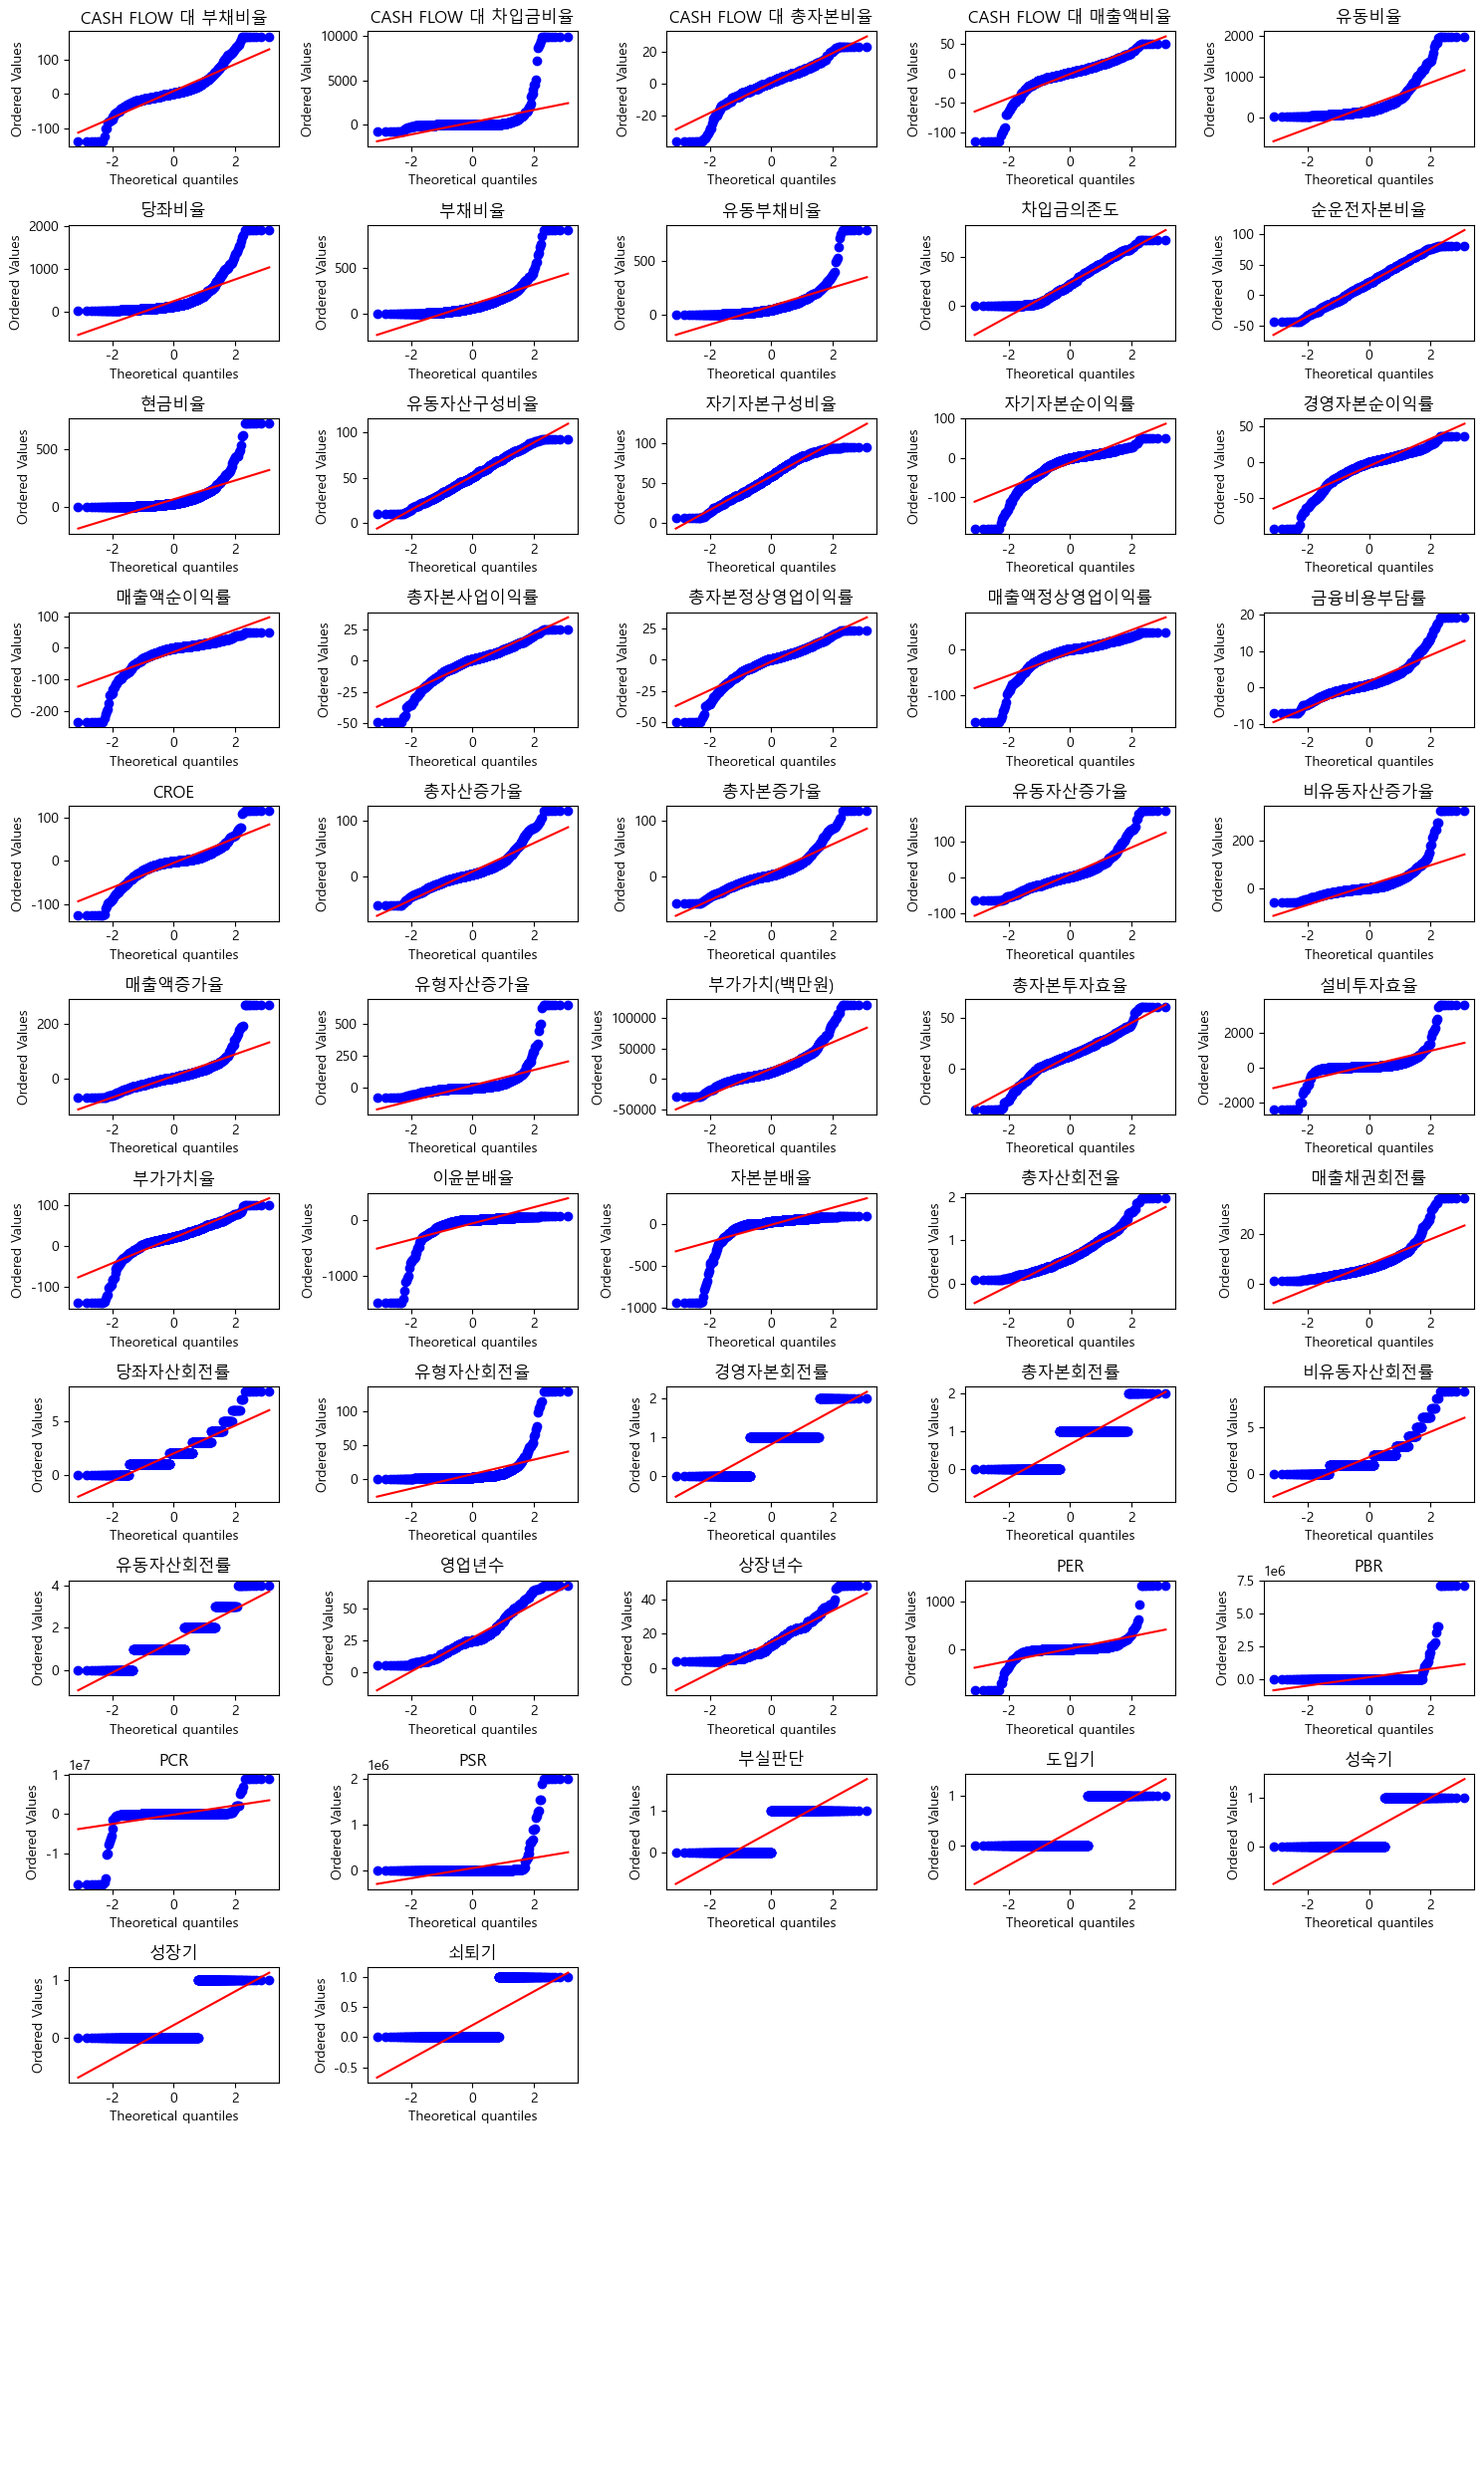

In [60]:
adj_features = adj_outlier(features, target=0.01, winsorizing=True)
qq_plot(adj_features)

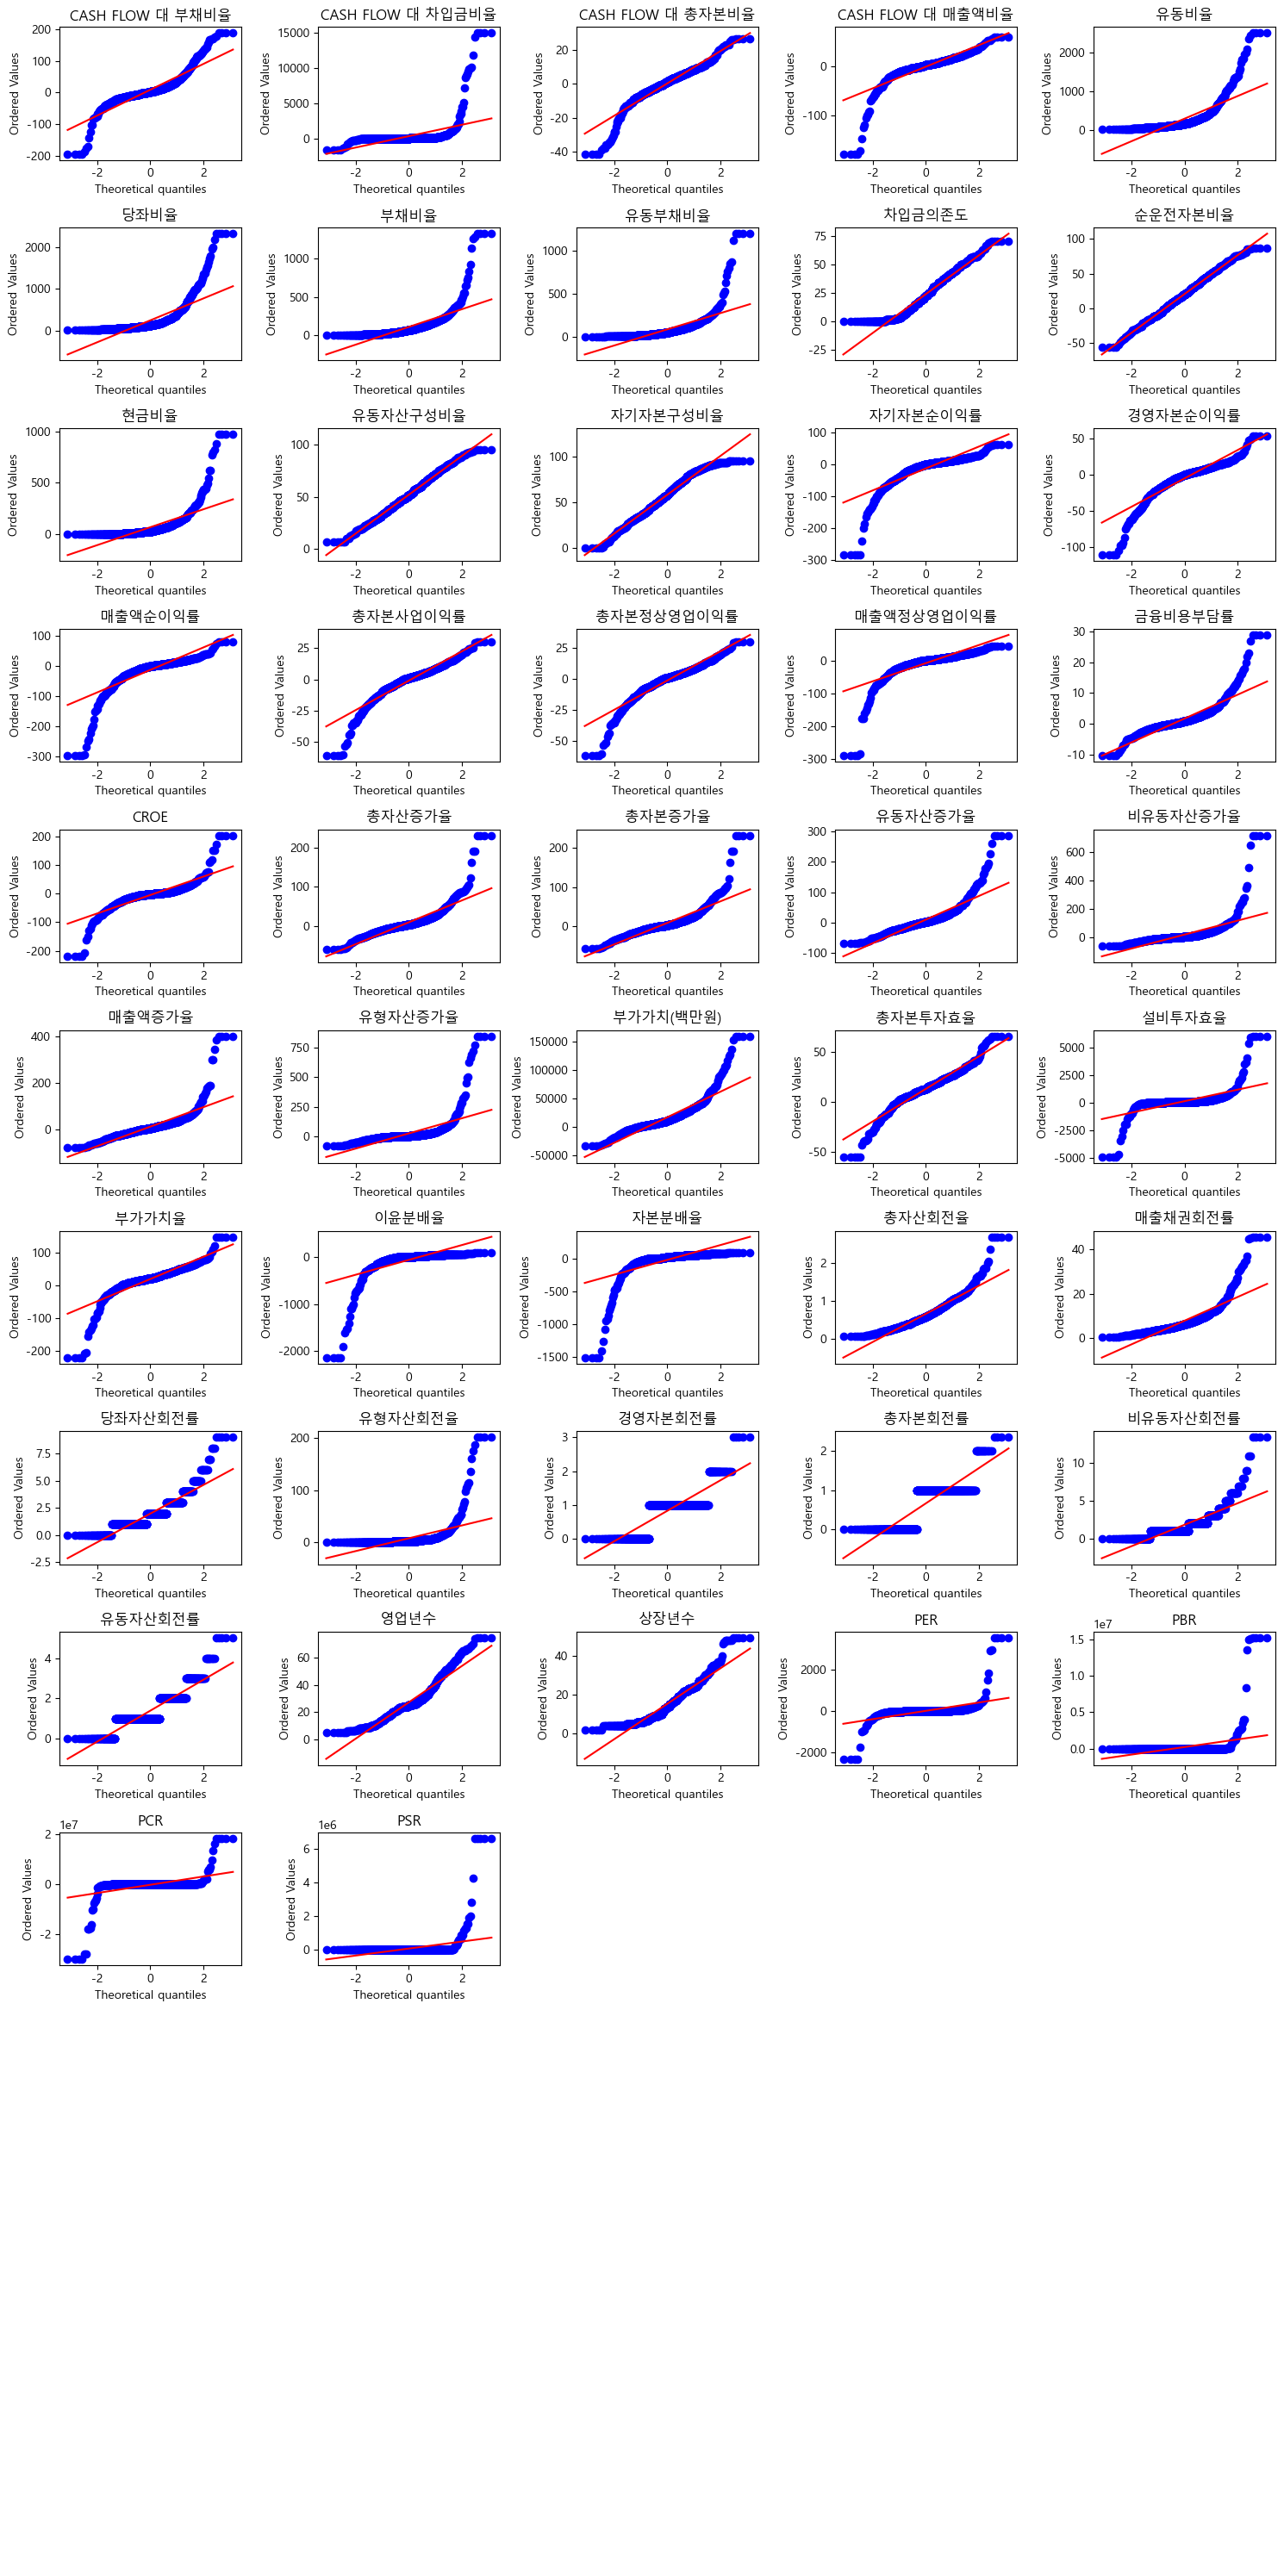

In [20]:
winsorized_data = adj_outlier(features, target=0.005, winsorizing=True)
qq_plot(winsorized_data)

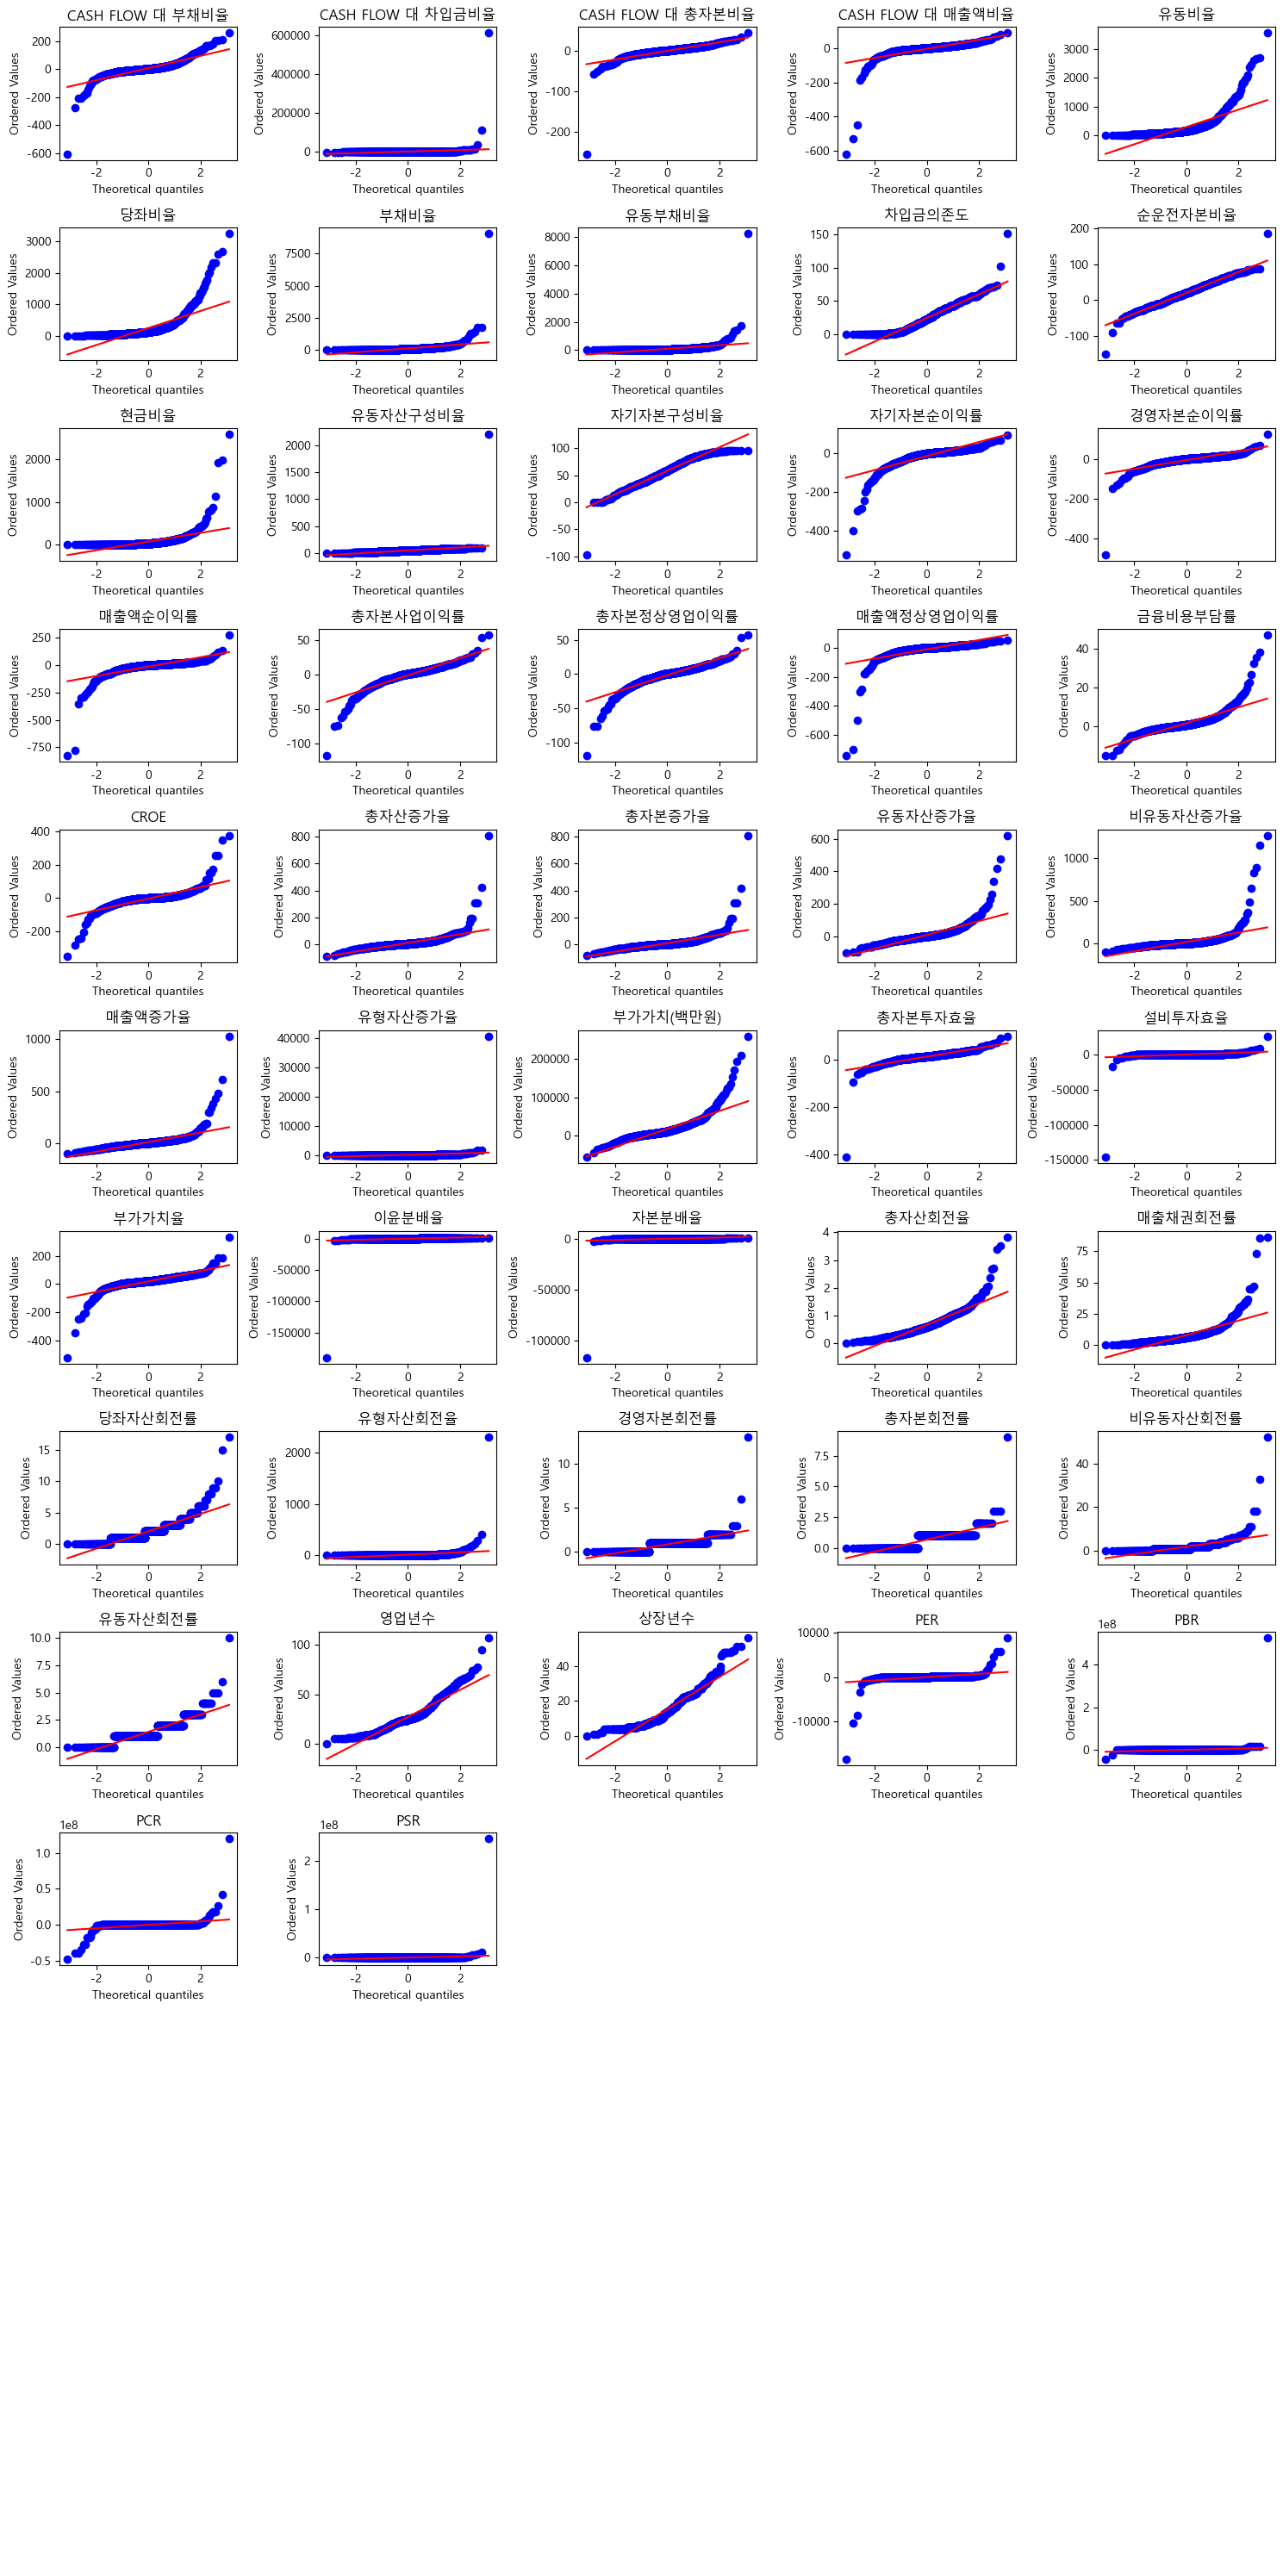

In [21]:
qq_plot(features)

# scipy를 사용한 Q-Q 플롯

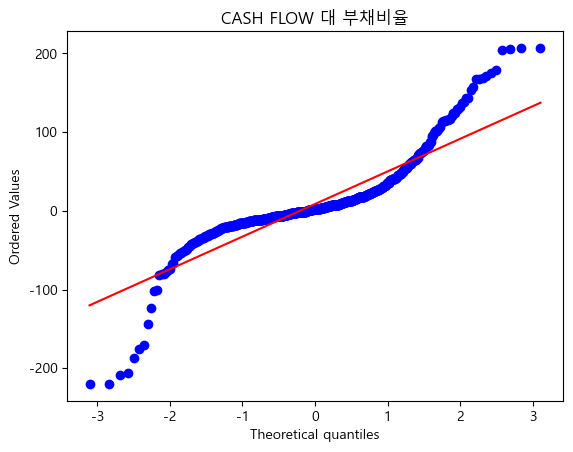

In [22]:
i = 0
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=.25, upper_percentile=99.75)
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

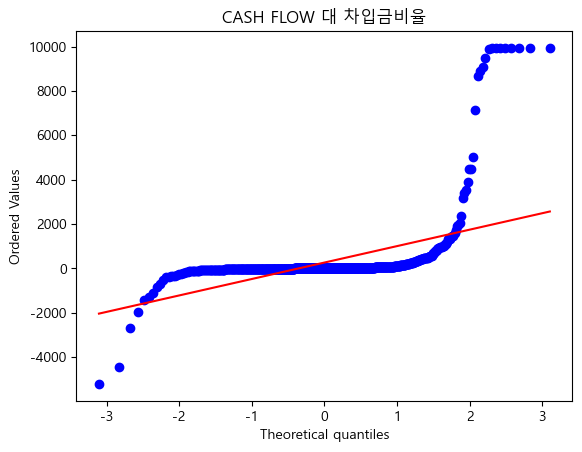

In [23]:
i = 1
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.)
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

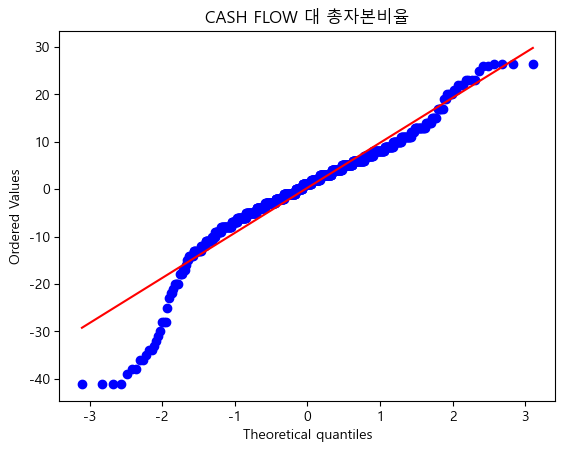

In [38]:
i = 2
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.5, upper_percentile=99.5)
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

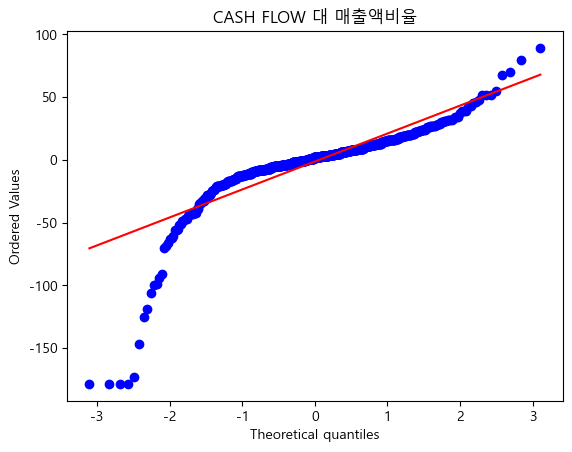

In [25]:
i = 3
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.5, upper_percentile=99.99)
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

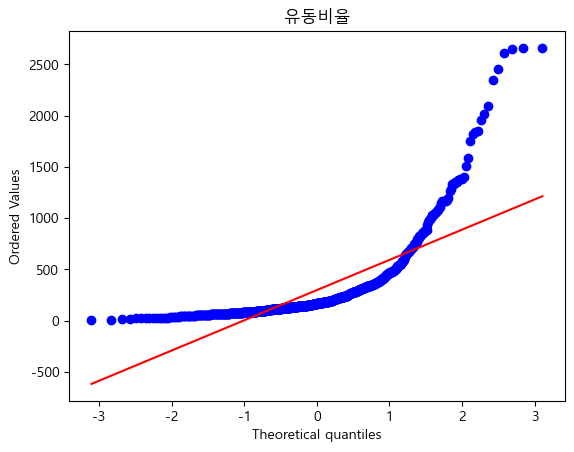

In [26]:
i = 4
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.75)
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

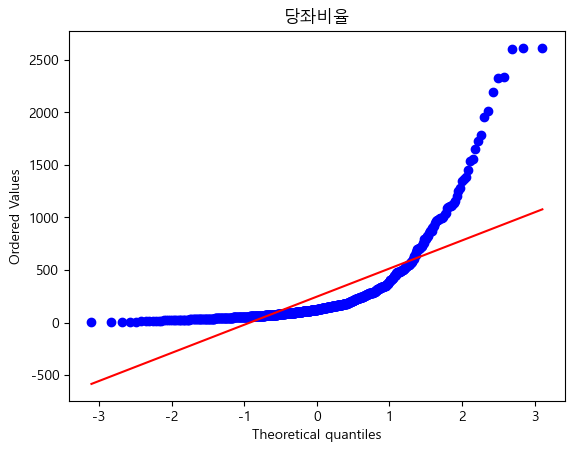

In [27]:
i = 5
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.75)
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

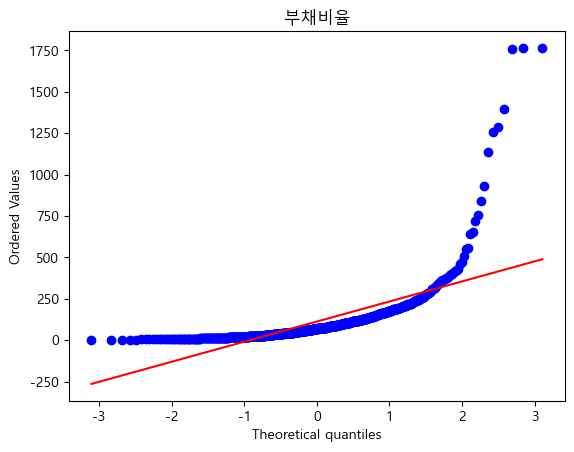

In [28]:
i = 6
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.75)
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

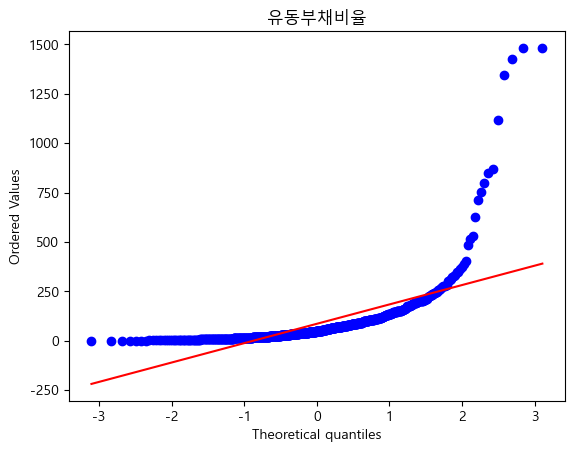

In [29]:
i = 7
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.75)
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

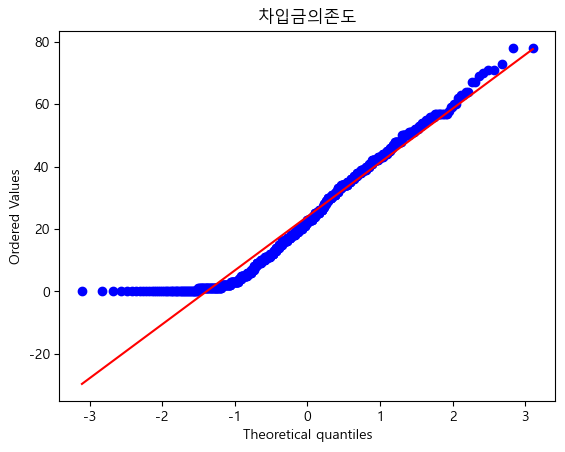

In [30]:
i = 8
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.75)
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

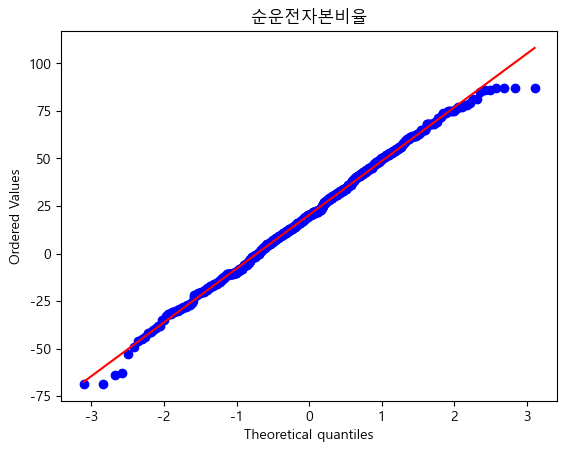

In [31]:
i = 9
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.25, upper_percentile=99.75)
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

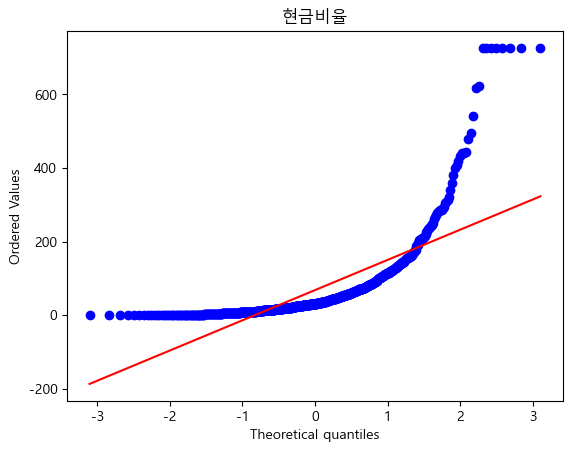

In [41]:
i = 10
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99)
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

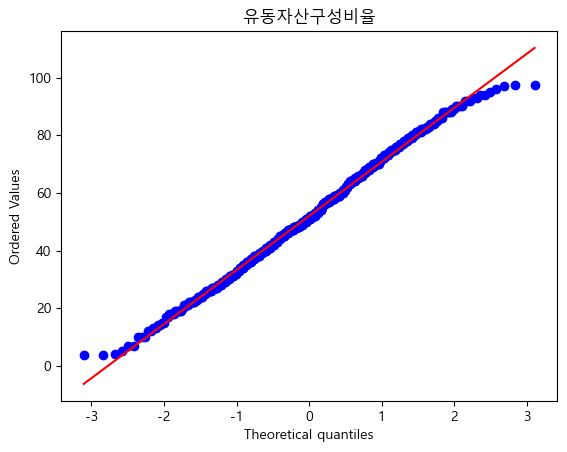

In [44]:
i = 11
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.25, upper_percentile=99.75)
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

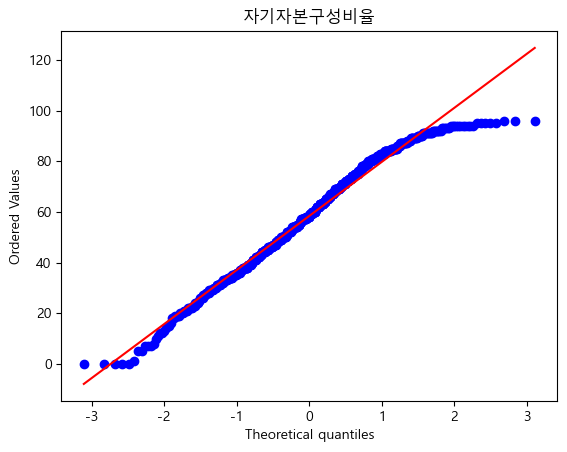

In [34]:
i = 12
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.25, upper_percentile=100)
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

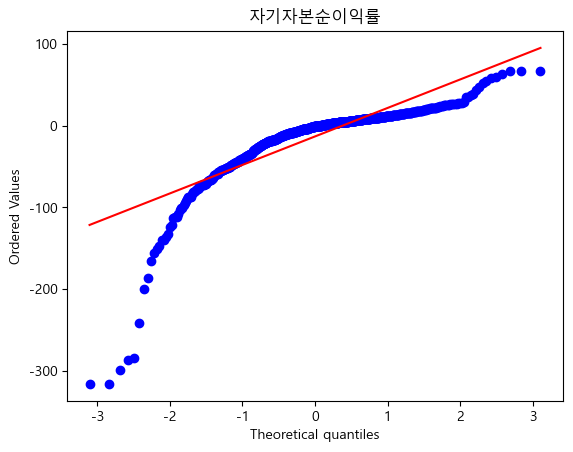

In [35]:
i = 13
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.25, upper_percentile=99.75)
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

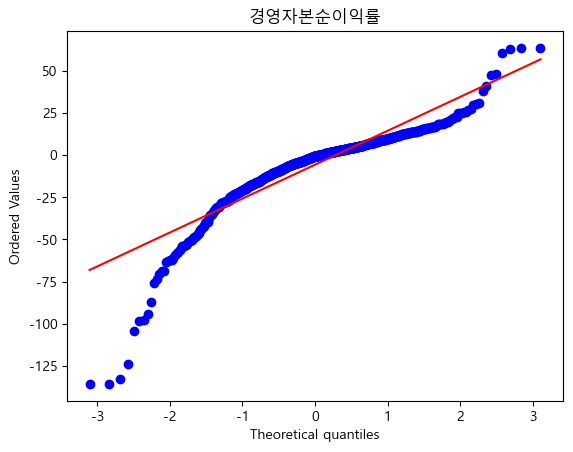

In [36]:
i = 14
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.25, upper_percentile=99.75)
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

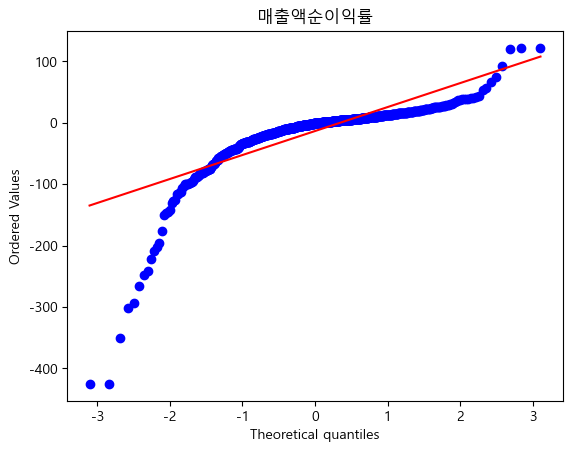

In [37]:
i = 15
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.25, upper_percentile=99.75)
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()